In [1]:
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_excel('survey2.xlsx')
print(df.columns)
Qs=['What kind(s) of Unit 1 work have you done? ','Which division(s) have you done Unit 1 work in?','I am a member of an equity-seeking group with respect to:']
As=[['Teaching Assistant (TA) / Lab Demonstrator / Grader','Course Instructor (CI)','Chief Presiding Officer (CPO)','Assistant Invigilator','Accessibility/AccessAbility Invigilators','TATP'],
['Humanities','Social sciences','Life sciences','Physical sciences / Engineering','Independent colleges / OISE / Other'],
['Gender identity','Sexual identity','Racial/ethnic identity','Disability/accessibility','Other']
   ]
names=[['TA','CI','CPO','AI','Access','TATP'],['Humanities','Socsci','Lifesci','Physsci','Indie'],['Gender','Sexual','Racial','Disability','Other']]

Index(['Timestamp',
       'Please choose your top 5 priority issues from the below list of financial issues:',
       'I would not even consider voting yes on the next Collective Agreement without progress on:',
       'Optional comments on financial priorities',
       'Please choose your top 5 priority issues from the below list of non-financial issues:',
       'I would not even consider voting yes on the next Collective Agreement without progress on:.1',
       'Optional comments on non-financial priorities', 'I am a...',
       'What kind(s) of Unit 1 work have you done? ',
       'What department(s) have you done Unit 1 work in?',
       'Which division(s) have you done Unit 1 work in?',
       'Which campus(es) have you done Unit 1 work at?',
       'I am a member of an equity-seeking group with respect to:'],
      dtype='object')


In [2]:
def make_bar_plot_financial(df,title,output_name):
    x=[]
    for ii in range(0,df.shape[0]):
        x.extend(df.iloc[ii][1].replace(', I',';I').replace(', Crea',';Crea').replace(', Red',';Red').split(';'))
           
    f=st.itemfreq(np.array(sorted(x,key=str.lower)))
    ylabels=f[:,0]
    data=f[:,1]
    pct=np.array(data).astype(float)/np.sum(data.astype(float))*500.
    
    f0=plt.figure(figsize=(16,8))
    ax=plt.subplot(111)
    rects=plt.barh(range(len(data)),pct)
    #autolabel(rects,ax,pct)
    
    plt.yticks(range(len(data)),ylabels)
    plt.title(title+' n=~' + str(np.sum(data.astype(int))/5.))
#    plt.tight_layout(rect=[0.1,0,1,1])
    plt.gcf().subplots_adjust(left=.5)
    plt.savefig(output_name)
    plt.close(f0)
plt.close()
make_bar_plot_financial(df,'all','all_financial.png')


In [3]:
for ii in range(0,len(Qs)):
    Q=Qs[ii]
    for jj in range(0,len(As[ii])):
        A=As[ii][jj]
        n=names[ii][jj]
        df2=df.ix[df[Q]==A]
        make_bar_plot_financial(df2,n,n+'_financial.png')

In [4]:
def make_bar_plot_nonfinancial(df,title,output_name):
    x=[]
    for ii in range(0,df.shape[0]):
        x.extend(df.iloc[ii][4].replace(', I',';I').replace(', A',';A').replace(', D',';D').replace(', P',';P').split(';'))
           
    f=st.itemfreq(np.array(sorted(x,key=str.lower)))
    ylabels=f[:,0]
    data=f[:,1]
    pct=np.array(data).astype(float)/np.sum(data.astype(float))*500.
    
    f0=plt.figure(figsize=(16,8))
    ax=plt.subplot(111)
    rects=plt.barh(range(len(data)),pct)
    
    plt.yticks(range(len(data)),ylabels)
    plt.title(title+' n=~' + str(np.sum(data.astype(int))/5.))
    plt.gcf().subplots_adjust(left=.5)
    plt.savefig(output_name)
    plt.close(f0)
make_bar_plot_nonfinancial(df,'all','all_nonfinancial.png')

In [5]:
for ii in range(0,len(Qs)):
    Q=Qs[ii]
    for jj in range(0,len(As[ii])):
        A=As[ii][jj]
        n=names[ii][jj]
        df2=df.ix[df[Q]==A]
        make_bar_plot_nonfinancial(df2,n,n+'_nonfinancial.png')

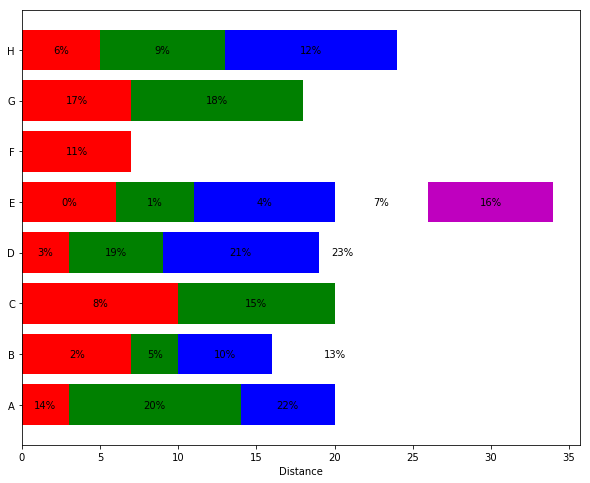

In [10]:
# some labels for each row
people = ('A','B','C','D','E','F','G','H')
r = len(people)

# how many data points overall (average of 3 per person)
n = r * 3

# which person does each segment belong to?
rows = np.random.randint(0, r, (n,))
# how wide is the segment?
widths = np.random.randint(3,12, n,)
# what label to put on the segment
labels = range(n)
colors ='rgbwmc'

patch_handles = []

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)



left = np.zeros(r,)
row_counts = np.zeros(r,)

for (r, w, l) in zip(rows, widths, labels):
#    print r, w, l
    patch_handles.append(ax.barh(r, w, align='center', left=left[r],
        color=colors[int(row_counts[r]) % len(colors)]))
    left[r] += w
    row_counts[r] += 1
    # we know there is only one patch but could enumerate if expanded
    patch = patch_handles[-1][0] 
    bl = patch.get_xy()
    x = 0.5*patch.get_width() + bl[0]
    y = 0.5*patch.get_height() + bl[1]
    ax.text(x, y, "%d%%" % (l), ha='center',va='center')

y_pos = np.arange(8)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Distance')

plt.show()